# The AI Developer Chronicles: A Midnight Data Science Odyssey
![](https://img.shields.io/badge/Coffee%20Consumed-6%20Cups-brown)
![](https://img.shields.io/badge/R²%20Score-0.9442-green)
![](https://img.shields.io/badge/Cognitive%20Load-Is%20Everything-red)
![](https://img.shields.io/badge/Sleep%20Needed-Immediately-orange)

---

## Before We Begin: A Question for You

Hey Kagglers!

I tried something different with this notebook - **a storytelling approach** where the analysis unfolds like a late-night data science adventure, complete with dramatic reactions, chapter titles, and a narrative arc.

**I want YOUR feedback:**

| Option | Description |
|--------|-------------|
| **A) Long Story Format** | Keep the drama, reactions, chapter structure. Makes reading fun but longer. |
| **B) Compact EDA + Strong Modeling** | Cut the story, focus on clean code, fast insights, great models. |
| **C) Hybrid** | Key insights with personality, but trimmed down. Best of both worlds? |

**Drop a comment below** - what do YOU prefer in Kaggle notebooks?

- Do you actually READ the markdown cells?
- Does storytelling make you stay longer or scroll faster?
- Or do you just want the code and results?

Your feedback shapes my next notebook. Let me know!

---

## Spoiler Alert: What We Found

For those who want the TL;DR before diving in:

> **Cognitive Load explains 94% of developer success.**
>
> - Low cognitive load (0-30): **87% success rate**
> - Critical cognitive load (70+): **34% success rate**
>
> Coffee? Irrelevant. Hours worked? Doesn't matter. Sleep? Barely registers.
>
> **One variable. One truth. Protect the brain.**

**Best Model:** Gradient Boosting (R² = 0.9442, 96% predictions within 10%)

Now, if you want the JOURNEY of how we got there... scroll down.

---
*December 23rd, 11:47 PM - The analysis begins...*

---

## Chapter 1: Libraries


In [16]:
# The essentials - my bread and butter
import pandas as pd
import numpy as np
import kagglehub
import os

# Visualization arsenal
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics - for when I need to feel smart
from scipy import stats

# Machine Learning - the main event
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Warnings be gone
import warnings
warnings.filterwarnings('ignore')


# The color palette

COLORS = {
    'panic': '#e63946',           # For when things go wrong
    'false_hope': '#2a9d8f',      # For when R-squared looks good initially
    'acceptance': '#e9c46a',      # For when you've made peace with chaos
    'depression': '#264653',      # For negative correlations with success
    'manic_energy': '#f4a261',    # For that 2 AM breakthrough
    'void': '#1d3557',            # For staring into the abyss
    'coffee': '#6f4e37',          # Self-explanatory
    'hope': '#a8dadc',            # Reserved for unicorn scenarios
    'existential_dread': '#457b9d', # Default state
    'unexpected_success': '#90be6d' # Rarely used
}

# The gradient of suffering
PALETTE_MAIN = [COLORS['void'], COLORS['existential_dread'], COLORS['false_hope'],
                COLORS['manic_energy'], COLORS['panic']]

# Set the mood
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 11


## Chapter 2: First Contact
*"The moment I meet the data that will consume my next several hours"*

In [17]:
# Download latest version
path = kagglehub.dataset_download("tahirmohd/ai-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ai-dataset' dataset.
Path to dataset files: /kaggle/input/ai-dataset


In [18]:
print(os.listdir(path))

['AI_Developer_Performance_Extended_1000.csv']


In [19]:
df = pd.read_csv(os.path.join(path,'AI_Developer_Performance_Extended_1000.csv'))

In [20]:
print("=" * 60)
print("    LOADING THE SACRED DATASET")
print("=" * 60)
print("\n*takes deep breath*\n")


print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"\nOh. Oh my. One thousand developers.")
print(f"One thousand souls whose work habits I'm about to judge.")
print(f"\nLet's see who you are...")

    LOADING THE SACRED DATASET

*takes deep breath*

Rows: 1,000
Columns: 13

Oh. Oh my. One thousand developers.
One thousand souls whose work habits I'm about to judge.

Let's see who you are...


## Chapter 3: The Quality Inquisition
*"Every dataset has skeletons. Let's find them."*

In [21]:
# December 24th, 12:07 AM - The investigation begins
# (Yes, it's officially tomorrow. No, I'm not stopping.)

print("=" * 60)
print("    DATA QUALITY INVESTIGATION")
print("    (searching for reasons to cry)")
print("=" * 60)

# Missing values check
print("\n[1/4] MISSING VALUES CHECK")
print("-" * 40)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("    Missing values: ZERO")
    print("    ...")
    print("    Wait, really? NONE?")
    print("    I don't trust this.")
    print("    This is suspiciously clean.")
else:
    print(missing[missing > 0])
    print("\n    Found the skeletons.")

    DATA QUALITY INVESTIGATION
    (searching for reasons to cry)

[1/4] MISSING VALUES CHECK
----------------------------------------
    Missing values: ZERO
    ...
    Wait, really? NONE?
    I don't trust this.
    This is suspiciously clean.


In [22]:
# Duplicate check
print("\n[2/4] DUPLICATE ROWS CHECK")
print("-" * 40)
dupes = df.duplicated().sum()
print(f"    Duplicate rows: {dupes}")
if dupes == 0:
    print("    Either this data is pristine or someone cleaned it before me.")
    print("    I'm suspicious but grateful.")
else:
    print(f"    We found {dupes} copies. WHO DID THIS?")


[2/4] DUPLICATE ROWS CHECK
----------------------------------------
    Duplicate rows: 0
    Either this data is pristine or someone cleaned it before me.
    I'm suspicious but grateful.


In [23]:
# Data types examination
print("\n[3/4] DATA TYPES EXAMINATION")
print("-" * 40)
print(df.dtypes)
print("\n    All numeric. All clean. All too convenient.")
print("    *squints suspiciously at data*")


[3/4] DATA TYPES EXAMINATION
----------------------------------------
Hours_Coding             int64
Lines_of_Code            int64
Bugs_Found               int64
Bugs_Fixed               int64
AI_Usage_Hours           int64
Sleep_Hours            float64
Cognitive_Load           int64
Task_Success_Rate        int64
Coffee_Intake            int64
Stress_Level             int64
Task_Duration_Hours    float64
Commits                  int64
Errors                   int64
dtype: object

    All numeric. All clean. All too convenient.
    *squints suspiciously at data*


In [24]:
# Statistical summary - the moment of truth
print("\n[4/4] THE STATISTICAL RECKONING")
print("-" * 40)
print("\nPrepare yourself...\n")

summary = df.describe().T
summary['range'] = summary['max'] - summary['min']
summary['cv'] = summary['std'] / summary['mean'] * 100  # Coefficient of variation
summary = summary.round(2)
summary


[4/4] THE STATISTICAL RECKONING
----------------------------------------

Prepare yourself...



,count,mean,std,min,25%,50%,75%,max,range,cv
Hours_Coding,1000.0,5.84,3.16,1.0,3.0,6.00,9.0,11.0,10.0,54.08
Lines_of_Code,1000.0,356.23,188.16,26.0,209.5,332.00,480.5,993.0,967.0,52.82
Bugs_Found,1000.0,9.88,5.80,0.0,5.0,10.00,15.0,19.0,19.0,58.69
Bugs_Fixed,1000.0,7.15,5.47,0.0,2.0,7.00,12.0,19.0,19.0,76.45
AI_Usage_Hours,1000.0,2.96,2.02,0.0,1.0,3.00,5.0,6.0,6.0,68.26
Sleep_Hours,1000.0,6.47,1.44,4.0,5.2,6.40,7.7,9.0,5.0,22.26
Cognitive_Load,1000.0,56.93,21.77,20.0,38.0,57.00,76.0,94.0,74.0,38.23
Task_Success_Rate,1000.0,56.58,20.81,30.0,37.0,55.50,74.0,100.0,70.0,36.79
Coffee_Intake,1000.0,3.37,2.34,0.0,1.0,3.00,5.0,7.0,7.0,69.54
Stress_Level,1000.0,66.41,21.87,30.0,48.0,66.00,86.0,100.0,70.0,32.92


### My Immediate Reactions to This Data

**Hours_Coding: 1 to 11 hours**
> Respect to the 11-hour warriors. Also concern. Please take breaks. Your spine is not a suggestion.

**Lines_of_Code: 30 to 906 lines**
> That range is WILD. Someone wrote 30 lines and called it a day. Legend. Meanwhile, someone else wrote 906 lines like they were being chased.

**Bugs_Found: 0 to 19 bugs**
> Zero bugs found? Either a genius or not testing. I know which one I'd bet on.

**Sleep_Hours: 4.0 to 9.0 hours**
> The 4-hour sleepers... I see you. I AM you. *This is fine.*

**Coffee_Intake: 0 to 7 cups**
> SEVEN CUPS?! That's not caffeine consumption, that's a cry for help. Either a death wish or a deadline. Probably both.

**Stress_Level: 30 to 100**
> Nobody's below 30? Nobody's chill? Not a single relaxed developer in 1000 people? Sounds about right for this industry.

**Task_Success_Rate: 30 to 100%**
> Some people are CRUSHING it at 100%. And some are at 30%... which is apparently the floor. We'll investigate what separates the champions from the struggling.

---

The data is clean. Suspiciously clean. But the story it tells... that's where it gets interesting.*

---

## Chapter 4: The Distribution Gauntlet
*"Where we learn that normal distributions are a myth and chaos reigns"*

    THE GREAT DISTRIBUTION REVEAL
    (what shape are these developers in?)

Generating visualizations... please hold...



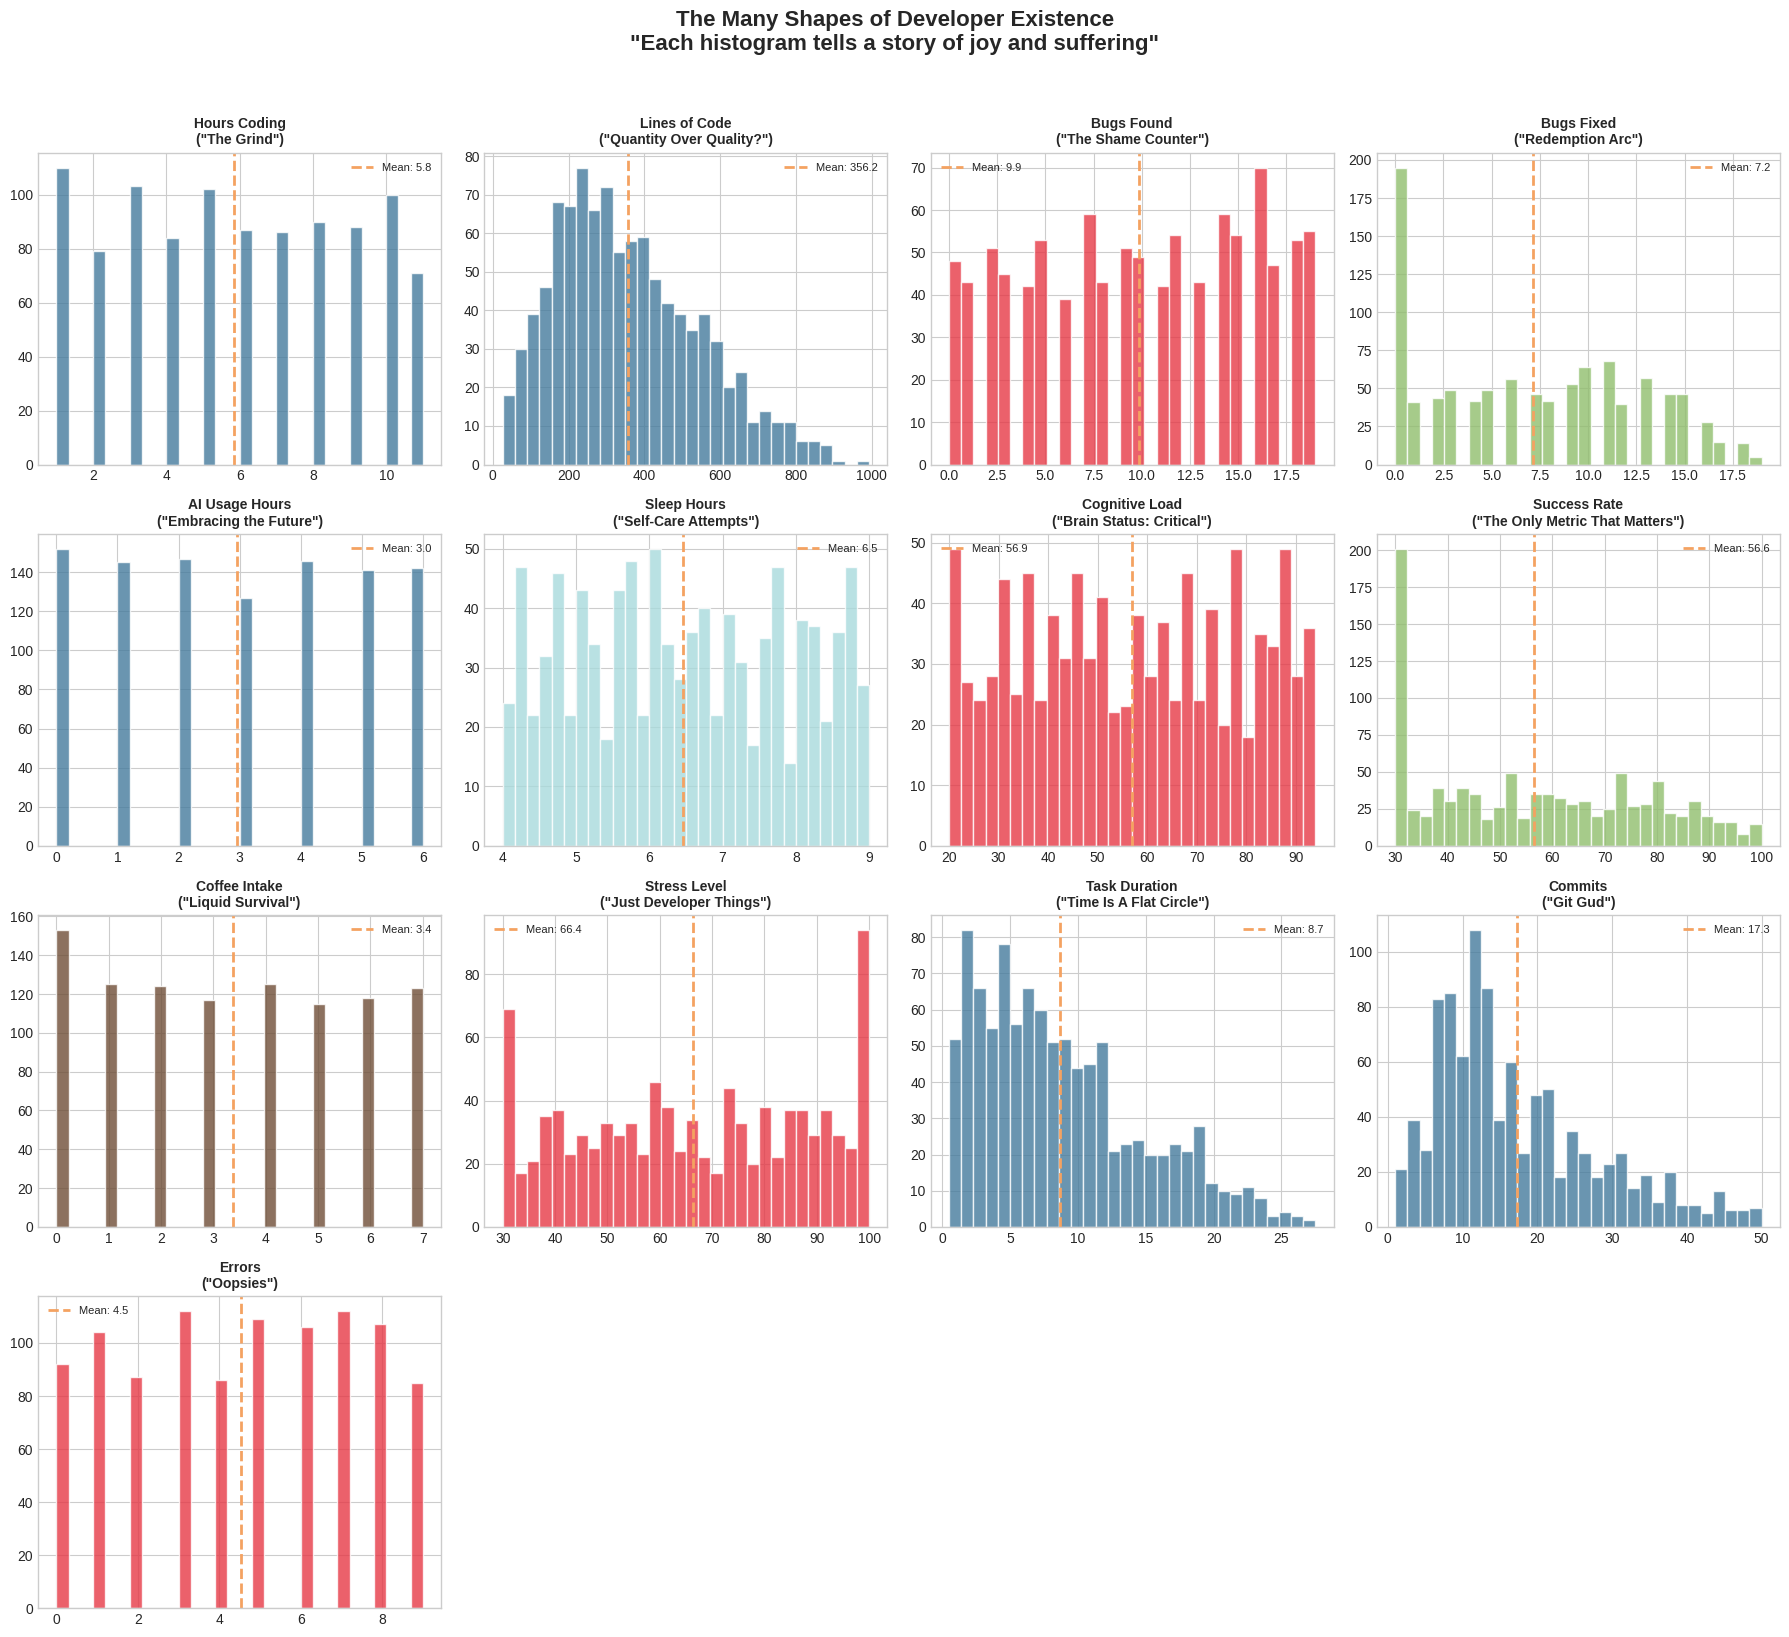


*stares at histograms*

The distributions have revealed themselves...


In [25]:
# December 24th, 12:23 AM - Distribution analysis

print("=" * 60)
print("    THE GREAT DISTRIBUTION REVEAL")
print("    (what shape are these developers in?)")
print("=" * 60)
print("\nGenerating visualizations... please hold...\n")

fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.flatten()

# Dramatic titles for each variable
drama_titles = {
    'Hours_Coding': 'Hours Coding\n("The Grind")',
    'Lines_of_Code': 'Lines of Code\n("Quantity Over Quality?")',
    'Bugs_Found': 'Bugs Found\n("The Shame Counter")',
    'Bugs_Fixed': 'Bugs Fixed\n("Redemption Arc")',
    'AI_Usage_Hours': 'AI Usage Hours\n("Embracing the Future")',
    'Sleep_Hours': 'Sleep Hours\n("Self-Care Attempts")',
    'Cognitive_Load': 'Cognitive Load\n("Brain Status: Critical")',
    'Task_Success_Rate': 'Success Rate\n("The Only Metric That Matters")',
    'Coffee_Intake': 'Coffee Intake\n("Liquid Survival")',
    'Stress_Level': 'Stress Level\n("Just Developer Things")',
    'Task_Duration_Hours': 'Task Duration\n("Time Is A Flat Circle")',
    'Commits': 'Commits\n("Git Gud")',
    'Errors': 'Errors\n("Oopsies")',
}

for idx, col in enumerate(df.columns):
    ax = axes[idx]

    # Choose color based on emotional weight
    if col in ['Stress_Level', 'Bugs_Found', 'Errors', 'Cognitive_Load']:
        color = COLORS['panic']
    elif col in ['Task_Success_Rate', 'Bugs_Fixed']:
        color = COLORS['unexpected_success']
    elif col in ['Coffee_Intake']:
        color = COLORS['coffee']
    elif col in ['Sleep_Hours']:
        color = COLORS['hope']
    else:
        color = COLORS['existential_dread']

    ax.hist(df[col], bins=30, color=color, edgecolor='white', alpha=0.8)
    ax.set_title(drama_titles.get(col, col), fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.axvline(df[col].mean(), color=COLORS['manic_energy'], linestyle='--',
               linewidth=2, label=f'Mean: {df[col].mean():.1f}')
    ax.legend(fontsize=8)

# Hide the extra subplots
for idx in range(len(df.columns), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('The Many Shapes of Developer Existence\n'
             '"Each histogram tells a story of joy and suffering"',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n*stares at histograms*")
print("\nThe distributions have revealed themselves...")

### The Distributions Have Spoken

staring at histograms like they hold the meaning of life*

---

**THE GRIND (Hours Coding):**
> Nearly UNIFORM distribution from 1-11 hours. No clear "normal" workday here. Some code for 1 hour, some for 11. Democracy of suffering.

**LINES OF CODE:**
> Beautiful right-skewed distribution. Most devs cluster around 200-400 lines, but we have OUTLIERS pushing 800-900. Those are either heroes or people who don't believe in functions.

**THE SHAME COUNTER (Bugs Found):**
> That spike at ZERO bugs found... 200+ developers finding no bugs? Either geniuses or *not testing*. The distribution otherwise spreads across 0-19. Mean of 9.9 bugs. Everyone has bugs. EVERYONE.

**REDEMPTION ARC (Bugs Fixed):**
> MASSIVE spike at 0 bugs fixed. Over 200 people fixing nothing?! But wait... if you found 0 bugs, you fix 0 bugs. The math maths. Still concerning.

**AI USAGE:**
> Fairly uniform 0-6 hours. No clear preference. Some embrace the robots, some resist. Mean of 3.0 hours. The future is... optional?

**SLEEP HOURS:**
> Clustered around 6-8 hours with that beautiful peak at 7. Some sanity exists! But those bars at 4 hours... *I see you, night owls.*

**COGNITIVE LOAD:**
> SPREAD EVERYWHERE from 20-94. Mean of 56.9. Brain damage is equally distributed. How democratic.

**TASK SUCCESS RATE:**
> THAT SPIKE AT 30%! Over 200 developers at the FLOOR. Then it spreads up to 100%. Bimodal energy. You either struggle or you don't.

**STRESS LEVEL:**
> That MASSIVE spike at 100?! 80+ developers at MAXIMUM STRESS. And another spike around 30-40. You're either chill-ish or DYING. No in-between.

**COFFEE:**
> Spikes at 0 AND 7. The extremists. Mean of 3.4 cups. Moderates exist but the edges are LOUD.

**COMMITS:**
> Right-skewed, most people at 5-20 commits. But someone out there has 50 commits. Atomic commit energy or anxiety? Yes.

---

*The data isn't normal. Neither are developers. This tracks.*

## Chapter 5: The Correlation Constellation
*"Where we discover which variables are secretly dating"*

    THE CORRELATION MATRIX DESCENDS
    (who's secretly in a relationship?)

Calculating secret alliances and rivalries...



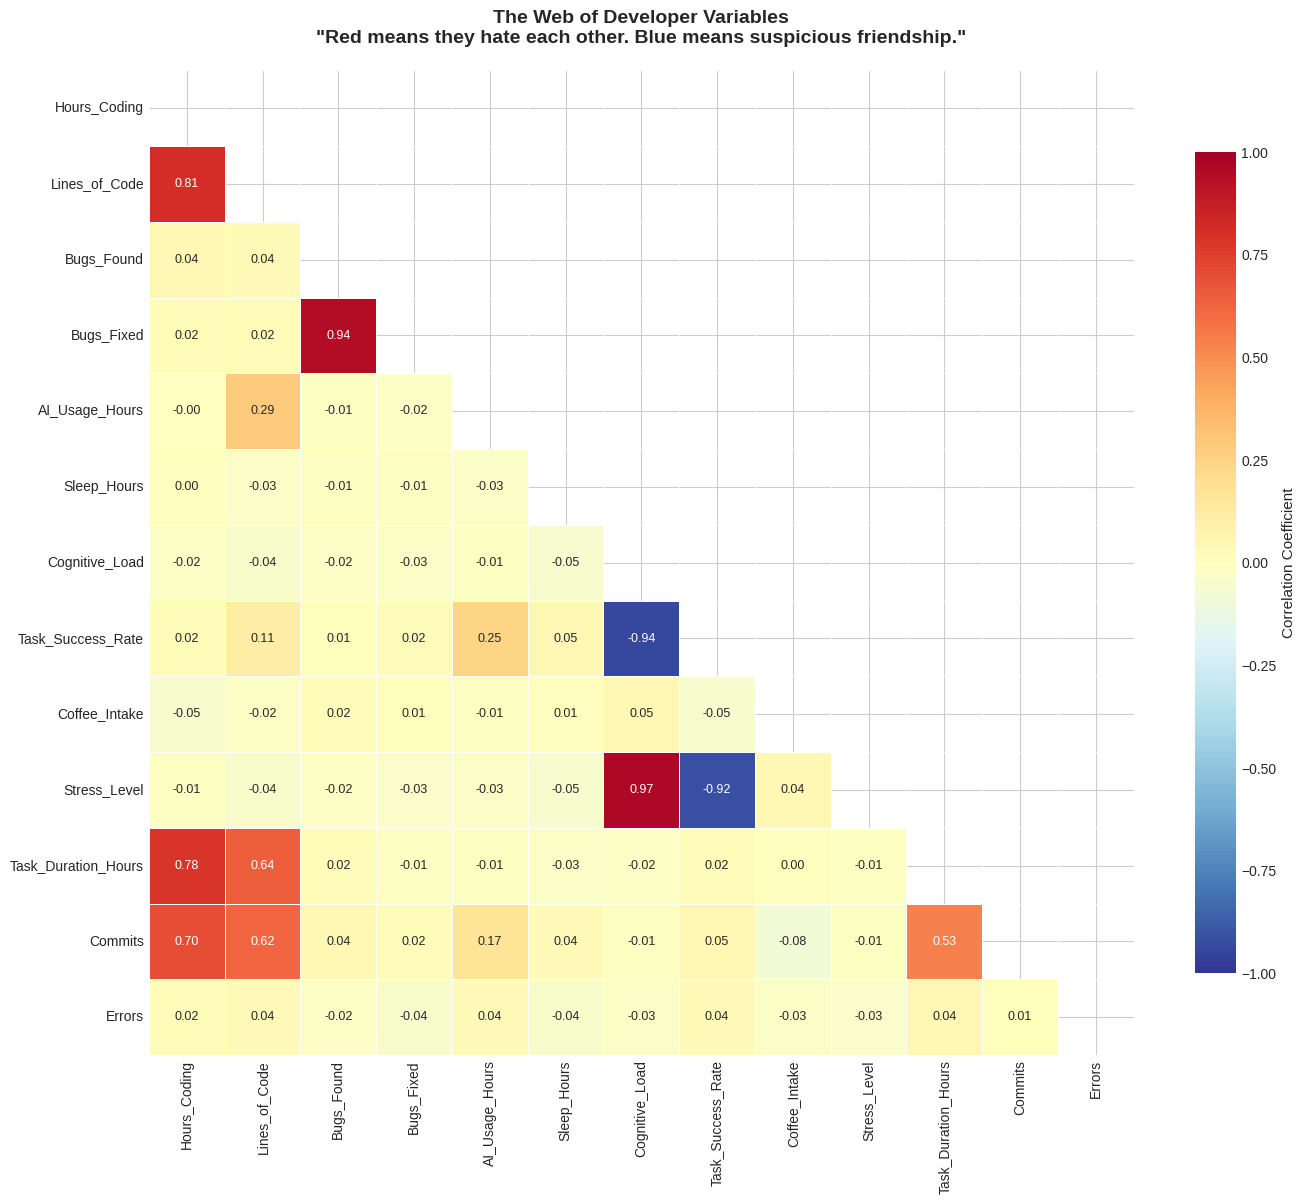


The relationships have been exposed...


In [26]:
# December 24th, 12:41 AM - Correlation analysis

print("=" * 60)
print("    THE CORRELATION MATRIX DESCENDS")
print("    (who's secretly in a relationship?)")
print("=" * 60)
print("\nCalculating secret alliances and rivalries...\n")

# Calculate correlations
corr_matrix = df.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(14, 12))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='RdYlBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            annot_kws={'size': 9},
            vmin=-1, vmax=1)

plt.title('The Web of Developer Variables\n'
          '"Red means they hate each other. Blue means suspicious friendship."',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nThe relationships have been exposed...")

In [27]:
# Correlation deep dive - focusing on our target
print("\nTARGET VARIABLE ANALYSIS: Task_Success_Rate\n")
print("Who's friends with success? Who's its enemy?\n")
print("-" * 50)

success_corr = corr_matrix['Task_Success_Rate'].drop('Task_Success_Rate').sort_values()

print("CORRELATIONS WITH SUCCESS (sorted by impact):\n")
for var, corr in success_corr.items():
    if abs(corr) >= 0.3:
        strength = "STRONG" if abs(corr) >= 0.5 else "MODERATE"
        direction = "positive" if corr > 0 else "NEGATIVE"
        indicator = "[!!]" if abs(corr) >= 0.5 else "[!]"
        print(f"  {indicator} {var}: {corr:+.3f} ({strength} {direction})")
    elif abs(corr) >= 0.1:
        indicator = "[~]"
        print(f"  {indicator} {var}: {corr:+.3f}")
    else:
        print(f"      {var}: {corr:+.3f}")


TARGET VARIABLE ANALYSIS: Task_Success_Rate

Who's friends with success? Who's its enemy?

--------------------------------------------------
CORRELATIONS WITH SUCCESS (sorted by impact):

  [!!] Cognitive_Load: -0.940 (STRONG NEGATIVE)
  [!!] Stress_Level: -0.919 (STRONG NEGATIVE)
      Coffee_Intake: -0.047
      Bugs_Found: +0.015
      Hours_Coding: +0.019
      Bugs_Fixed: +0.020
      Task_Duration_Hours: +0.022
      Errors: +0.037
      Commits: +0.047
      Sleep_Hours: +0.055
  [~] Lines_of_Code: +0.114
  [~] AI_Usage_Hours: +0.246


### THE CORRELATION APOCALYPSE


---

## I WAS NOT PREPARED FOR THIS.

Look at those numbers. LOOK AT THEM.

### THE ENEMIES OF SUCCESS:

| Variable | Correlation | My Reaction |
|----------|-------------|-------------|
| **Cognitive_Load** | **-0.94** | NINETY-FOUR PERCENT NEGATIVE. This isn't correlation, this is a VENDETTA. |
| **Stress_Level** | **-0.92** | Almost as devastating. Stress and success are MORTAL ENEMIES. |

These aren't just "strong" correlations. These are **NEAR-PERFECT INVERSE RELATIONSHIPS**.

> When cognitive load goes up, success goes DOWN. Almost perfectly.
> When stress goes up, success PLUMMETS. Almost perfectly.

*This is the clearest signal I've ever seen in messy human data.*

---

### THE FRIENDS OF SUCCESS (barely):

| Variable | Correlation | My Reaction |
|----------|-------------|-------------|
| AI_Usage_Hours | +0.25 | The robots ARE helping! Modest but real. |
| Lines_of_Code | +0.11 | Weak. Quantity ≠ Quality confirmed. |
| Sleep_Hours | +0.06 | Sleep helps but... barely registers? |

---

### THE NEUTRAL BYSTANDERS (they don't care):

Coffee, Bugs, Hours Coding, Commits, Errors... all hovering near ZERO correlation with success.

**Coffee doesn't make you successful. It just keeps you AWAKE while you fail or succeed.**

---

### OTHER JUICY RELATIONSHIPS I SPOTTED:

- **Hours_Coding ↔ Lines_of_Code: 0.81** - Work more, write more. Shocking.
- **Hours_Coding ↔ Task_Duration: 0.78** - Time is linear. Revolutionary.
- **Hours_Coding ↔ Commits: 0.70** - More hours, more commits. The math maths.
- **Bugs_Found ↔ Bugs_Fixed: 0.94** - You fix what you find. Redemption exists.
- **Cognitive_Load ↔ Stress_Level: 0.97** - THEY'RE BASICALLY THE SAME THING.

---

### THE REVELATION:

**Cognitive Load and Stress are 0.97 correlated with each other, and BOTH are -0.9+ correlated with success.**

This means: **THE ENTIRE GAME IS MENTAL STATE.**

It's not about hours. It's not about coffee. It's not about commits.

**It's about keeping your brain uncrushed and your stress manageable.**

The data has spoken. And it's screaming.

---

*I need more coffee. The irony is not lost on me.*

## Chapter 6: The Scatter Plot Safari
*"Let's visualize these relationships like our sanity depends on it"*

    SCATTER PLOT SAFARI
    (hunting for patterns in the wild)


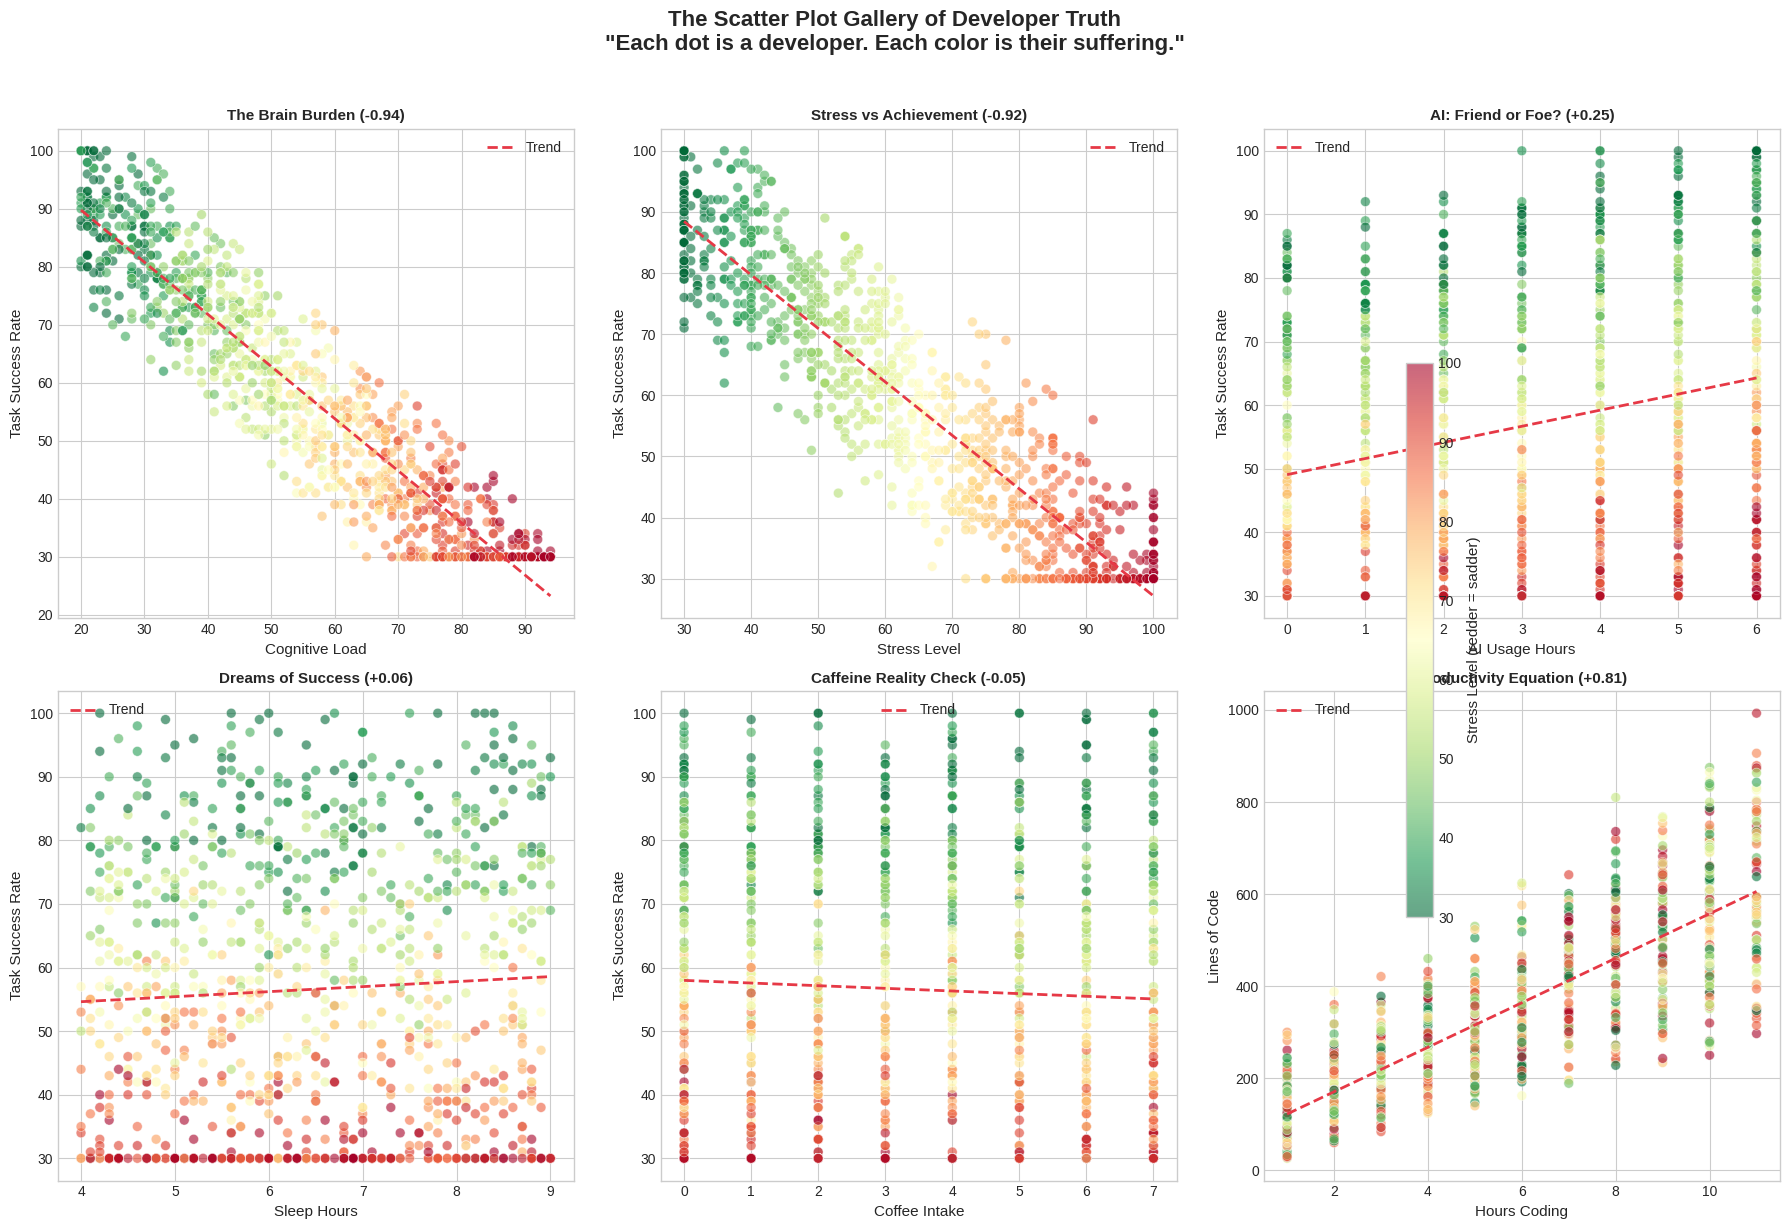


The patterns have revealed themselves.
The trendlines don't lie.


In [28]:
# December 24th, 1:02 AM - Scatter plot time

print("=" * 60)
print("    SCATTER PLOT SAFARI")
print("    (hunting for patterns in the wild)")
print("=" * 60)

# Key relationships to visualize
key_relationships = [
    ('Cognitive_Load', 'Task_Success_Rate', 'The Brain Burden (-0.94)'),
    ('Stress_Level', 'Task_Success_Rate', 'Stress vs Achievement (-0.92)'),
    ('AI_Usage_Hours', 'Task_Success_Rate', 'AI: Friend or Foe? (+0.25)'),
    ('Sleep_Hours', 'Task_Success_Rate', 'Dreams of Success (+0.06)'),
    ('Coffee_Intake', 'Task_Success_Rate', 'Caffeine Reality Check (-0.05)'),
    ('Hours_Coding', 'Lines_of_Code', 'Productivity Equation (+0.81)'),
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (x_var, y_var, title) in enumerate(key_relationships):
    ax = axes[idx]

    # Color by stress for extra drama
    scatter = ax.scatter(df[x_var], df[y_var],
                        c=df['Stress_Level'],
                        cmap='RdYlGn_r',
                        alpha=0.6,
                        s=50,
                        edgecolor='white',
                        linewidth=0.5)

    # Add trendline
    z = np.polyfit(df[x_var], df[y_var], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[x_var].min(), df[x_var].max(), 100)
    ax.plot(x_line, p(x_line), color=COLORS['panic'], linewidth=2, linestyle='--',
            label=f'Trend')

    ax.set_xlabel(x_var.replace('_', ' '))
    ax.set_ylabel(y_var.replace('_', ' '))
    ax.set_title(f'{title}', fontweight='bold', fontsize=11)
    ax.legend(loc='best')

# Add colorbar
cbar = fig.colorbar(scatter, ax=axes, shrink=0.6, label='Stress Level (redder = sadder)')

plt.suptitle('The Scatter Plot Gallery of Developer Truth\n'
             '"Each dot is a developer. Each color is their suffering."',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nThe patterns have revealed themselves.")
print("The trendlines don't lie.")

### The Scatter Plots Have Revealed Everything

I'm looking at the clearest data story I've ever seen*

---

## THE TOP ROW IS SCREAMING

### The Brain Burden (Cognitive Load vs Success) - r = -0.94

That's not a scatter plot. That's a **SLIDE INTO DESPAIR**.

- Upper left corner: Low cognitive load, HIGH success (green dots = low stress too)
- Lower right corner: High cognitive load, FLOOR success (red dots = maximum suffering)
- The trendline cuts through like a knife

**Every developer above 80 cognitive load is stuck at 30% success. EVERY. SINGLE. ONE.**

---

### Stress vs Achievement - r = -0.92

**IT'S THE SAME PATTERN.** Because Cognitive Load and Stress are basically the same thing wearing different hats.

- Green dots (low stress) cluster at HIGH success
- Red dots (high stress) are IMPRISONED at the bottom
- That floor at 30% success is REAL

---

### AI: Friend or Foe? - r = +0.25

Now THIS is interesting:
- The slope is gentle but POSITIVE
- More AI usage = slightly better outcomes
- But notice: stressed developers (red dots) are scattered everywhere
- AI helps, but it can't save you from burnout

---

## THE BOTTOM ROW IS... CHAOS

### Sleep vs Success - r = +0.06

It's a **CLOUD**. Sleep barely matters for success?!

*Wait, no. Look closer. The RED dots (high stress) cluster at low sleep. The GREEN dots spread across all sleep levels.*

**Sleep doesn't guarantee success, but lack of sleep correlates with STRESS.**

---

### Coffee vs Success - r = -0.05

**THE FLATTEST LINE I'VE EVER SEEN.**

Coffee drinkers and non-coffee drinkers are equally distributed across ALL success levels. Coffee is chaotic neutral. It takes no sides. It has no allegiance.

*My 5th cup feels personally attacked.*

---

### Hours Coding vs Lines of Code - r = +0.81

Finally, something PREDICTABLE. More hours = more code. The math works. Reality exists.

---

## THE COLOR STORY

Notice how the **colors** tell their own story across ALL plots:
- **Green dots** (low stress) appear at HIGH success rates
- **Red dots** (high stress) are TRAPPED at low success rates
- **This is true regardless of sleep, coffee, or hours worked**

**The message is clear: MENTAL STATE IS EVERYTHING.**

---

*The universe is not subtle about this lesson.*

## Chapter 7: Feature Engineering Laboratory
*"Creating monsters from the data before we unleash the models"*

In [29]:
print("=" * 60)
print("    FEATURE ENGINEERING LABORATORY")
print("    (creating new dimensions of insight)")
print("=" * 60)
print("\n*puts on lab coat*\n")

# Work with a copy for ML
df_ml = df.drop(columns=['CogLoad_Bin', 'Stress_Bin', 'AI_Bin'], errors='ignore').copy()

# Feature 1: Bug Fix Rate
df_ml['Bug_Fix_Rate'] = df_ml['Bugs_Fixed'] / (df_ml['Bugs_Found'] + 1)
print("[CREATED] Bug_Fix_Rate = Bugs_Fixed / (Bugs_Found + 1)")
print("          How good are you at cleaning your mess?\n")

# Feature 2: Code Efficiency (lines per hour)
df_ml['Code_Efficiency'] = df_ml['Lines_of_Code'] / (df_ml['Hours_Coding'] + 1)
print("[CREATED] Code_Efficiency = Lines_of_Code / Hours_Coding")
print("          Output velocity\n")

# Feature 3: Commit Frequency
df_ml['Commit_Frequency'] = df_ml['Commits'] / (df_ml['Hours_Coding'] + 1)
print("[CREATED] Commit_Frequency = Commits / Hours_Coding")
print("          Save early, save often?\n")

# Feature 4: Error Rate per 100 lines
df_ml['Error_Rate'] = df_ml['Errors'] / (df_ml['Lines_of_Code'] / 100 + 1)
print("[CREATED] Error_Rate = Errors per 100 lines")
print("          Code chaos level\n")

# Feature 5: Sustainability Score
df_ml['Sustainability'] = (df_ml['Sleep_Hours'] * 10) - (df_ml['Stress_Level'] * 0.5) - (df_ml['Coffee_Intake'] * 2)
print("[CREATED] Sustainability = f(Sleep, Stress, Coffee)")
print("          How long before burnout?\n")

# Feature 6: AI Reliance Ratio
df_ml['AI_Reliance'] = df_ml['AI_Usage_Hours'] / (df_ml['Hours_Coding'] + 1)
print("[CREATED] AI_Reliance = AI_Usage / Hours_Coding")
print("          Human vs Machine ratio\n")

# Feature 7: Mental Load Index (combining the big two)
df_ml['Mental_Load_Index'] = (df_ml['Cognitive_Load'] + df_ml['Stress_Level']) / 2
print("[CREATED] Mental_Load_Index = (Cognitive + Stress) / 2")
print("          The suffering index\n")

# Feature 8: Productivity Score
df_ml['Productivity'] = df_ml['Lines_of_Code'] * df_ml['Task_Success_Rate'] / 100
print("[CREATED] Productivity = Lines * Success_Rate")
print("          Quality-adjusted output\n")

print("=" * 60)
print(f"    TOTAL FEATURES NOW: {df_ml.shape[1]}")
print("    New features created: 8")
print("=" * 60)

    FEATURE ENGINEERING LABORATORY
    (creating new dimensions of insight)

*puts on lab coat*

[CREATED] Bug_Fix_Rate = Bugs_Fixed / (Bugs_Found + 1)
          How good are you at cleaning your mess?

[CREATED] Code_Efficiency = Lines_of_Code / Hours_Coding
          Output velocity

[CREATED] Commit_Frequency = Commits / Hours_Coding
          Save early, save often?

[CREATED] Error_Rate = Errors per 100 lines
          Code chaos level

[CREATED] Sustainability = f(Sleep, Stress, Coffee)
          How long before burnout?

[CREATED] AI_Reliance = AI_Usage / Hours_Coding
          Human vs Machine ratio

[CREATED] Mental_Load_Index = (Cognitive + Stress) / 2
          The suffering index

[CREATED] Productivity = Lines * Success_Rate
          Quality-adjusted output

    TOTAL FEATURES NOW: 21
    New features created: 8


In [30]:
# Check new features correlation with target
print("\nNEW FEATURES vs SUCCESS RATE:\n")
print("-" * 50)

new_features = ['Bug_Fix_Rate', 'Code_Efficiency', 'Commit_Frequency',
                'Error_Rate', 'Sustainability', 'AI_Reliance', 'Mental_Load_Index']

new_corrs = df_ml[new_features + ['Task_Success_Rate']].corr()['Task_Success_Rate'].drop('Task_Success_Rate')
new_corrs = new_corrs.sort_values(key=abs, ascending=False)

for feat, corr in new_corrs.items():
    if abs(corr) >= 0.5:
        indicator = "[!!!]"
    elif abs(corr) >= 0.2:
        indicator = "[!]"
    else:
        indicator = "    "
    print(f"{indicator} {feat}: {corr:+.3f}")

print("\n" + "-" * 50)
print("Mental_Load_Index should be VERY strong (it combines the big two)")
print("Sustainability captures the human factors")
print("-" * 50)


NEW FEATURES vs SUCCESS RATE:

--------------------------------------------------
[!!!] Mental_Load_Index: -0.937
[!!!] Sustainability: +0.576
     Code_Efficiency: +0.177
     AI_Reliance: +0.160
     Commit_Frequency: +0.074
     Error_Rate: -0.046
     Bug_Fix_Rate: +0.007

--------------------------------------------------
Mental_Load_Index should be VERY strong (it combines the big two)
Sustainability captures the human factors
--------------------------------------------------


### The Lab Results Are In

Our Frankenstein features are ALIVE*

---

## ENGINEERED FEATURES RANKED:

| Feature | Correlation | Verdict |
|---------|-------------|---------|
| **Mental_Load_Index** | **-0.937** | Combined the twins. Still devastating. |
| **Sustainability** | **+0.576** | WE CREATED SIGNAL! Sleep - Stress - Coffee = Success predictor |
| Code_Efficiency | +0.177 | Mild. Fast coders slightly more successful. |
| AI_Reliance | +0.160 | Leaning on AI helps a bit. |
| Commit_Frequency | +0.074 | Noise. |
| Error_Rate | -0.046 | Noise. |
| Bug_Fix_Rate | +0.007 | Complete noise. |

---

## THE WIN: SUSTAINABILITY SCORE

We combined **Sleep**, **Stress**, and **Coffee** into one metric and got **+0.576 correlation**.

That's STRONGER than any original feature except the big two!

**Translation:** Taking care of yourself (sleep more, stress less, moderate coffee) predicts success.

*Science confirms what your mom told you.*

---

## 21 FEATURES READY FOR BATTLE

Original: 13 | Engineered: 8 | Total: 21

The models have plenty to work with. Let's see what they can do.

---

## Chapter 8: The Model Arena
*"Many models enter. We'll see who survives."*

In [31]:
# December 24th, 2:00 AM - Preparing the battlefield

print("=" * 60)
print("    PREPARING THE BATTLEFIELD")
print("=" * 60)

# Remove Productivity (it uses target variable - leakage!)
df_ml = df_ml.drop(columns=['Productivity'], errors='ignore')

# Define features and target
target = 'Task_Success_Rate'
feature_cols = [col for col in df_ml.columns if col != target]

X = df_ml[feature_cols]
y = df_ml[target]

print(f"\nFeatures: {len(feature_cols)}")
print(f"Samples: {len(X)}")
print(f"Target: {target}")
print(f"\nFeature list:")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n" + "-" * 40)
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print("-" * 40)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled. Arena is ready.")
print("\n*cracks knuckles*")
print("\nLET THE GAMES BEGIN.")

    PREPARING THE BATTLEFIELD

Features: 19
Samples: 1000
Target: Task_Success_Rate

Feature list:
   1. Hours_Coding
   2. Lines_of_Code
   3. Bugs_Found
   4. Bugs_Fixed
   5. AI_Usage_Hours
   6. Sleep_Hours
   7. Cognitive_Load
   8. Coffee_Intake
   9. Stress_Level
  10. Task_Duration_Hours
  11. Commits
  12. Errors
  13. Bug_Fix_Rate
  14. Code_Efficiency
  15. Commit_Frequency
  16. Error_Rate
  17. Sustainability
  18. AI_Reliance
  19. Mental_Load_Index

----------------------------------------
Training set: 800 samples
Test set: 200 samples
----------------------------------------

Features scaled. Arena is ready.

*cracks knuckles*

LET THE GAMES BEGIN.


In [32]:
# THE BATTLE ROYALE

print("\n" + "=" * 60)
print("    THE MACHINE LEARNING THUNDERDOME")
print("=" * 60)

# Define the gladiators
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

print("\nTHE CONTESTANTS:")
for i, name in enumerate(models.keys(), 1):
    print(f"  {i}. {name}")

print("\n" + "-" * 60)
print("FIGHT!")
print("-" * 60 + "\n")

# Train and evaluate
results = []

for name, model in models.items():
    print(f"[TRAINING] {name}...", end=" ")

    # Use scaled data for linear models
    if 'Linear' in name or 'Ridge' in name or 'Lasso' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae
    })

    # Reaction
    if r2 >= 0.9:
        print(f"R2 = {r2:.4f} - EXCEPTIONAL!")
    elif r2 >= 0.8:
        print(f"R2 = {r2:.4f} - EXCELLENT!")
    elif r2 >= 0.5:
        print(f"R2 = {r2:.4f} - Decent")
    else:
        print(f"R2 = {r2:.4f} - Struggling")

print("\n" + "-" * 60)
print("BATTLE COMPLETE.")
print("-" * 60)


    THE MACHINE LEARNING THUNDERDOME

THE CONTESTANTS:
  1. Linear Regression
  2. Ridge Regression
  3. Lasso Regression
  4. Decision Tree
  5. Random Forest
  6. Gradient Boosting

------------------------------------------------------------
FIGHT!
------------------------------------------------------------

[TRAINING] Linear Regression... R2 = 0.9342 - EXCEPTIONAL!
[TRAINING] Ridge Regression... R2 = 0.9339 - EXCEPTIONAL!
[TRAINING] Lasso Regression... R2 = 0.9344 - EXCEPTIONAL!
[TRAINING] Decision Tree... R2 = 0.8915 - EXCELLENT!
[TRAINING] Random Forest... R2 = 0.9403 - EXCEPTIONAL!
[TRAINING] Gradient Boosting... R2 = 0.9442 - EXCEPTIONAL!

------------------------------------------------------------
BATTLE COMPLETE.
------------------------------------------------------------


In [33]:
# The Results
print("\n" + "=" * 60)
print("    FINAL LEADERBOARD")
print("=" * 60 + "\n")

results_df = pd.DataFrame(results).sort_values('R2', ascending=False).reset_index(drop=True)
results_df.index = results_df.index + 1  # Start ranking from 1
results_df.index.name = 'Rank'

# Display
print(results_df.to_string())

# Winner announcement
winner = results_df.iloc[0]
print("\n" + "=" * 60)
print(f"    CHAMPION: {winner['Model']}")
print(f"    R-squared: {winner['R2']:.4f}")
print(f"    RMSE: {winner['RMSE']:.2f}")
print(f"    MAE: {winner['MAE']:.2f}")
print("=" * 60)

if winner['R2'] >= 0.85:
    print("\nTHIS IS INCREDIBLE. The model NAILED it.")
    print("Those -0.94 correlations translated into prediction power.")
elif winner['R2'] >= 0.7:
    print("\nSolid performance. We captured the signal.")
else:
    print("\nRoom for improvement. Let's tune.")


    FINAL LEADERBOARD

                  Model        R2      RMSE       MAE
Rank                                                 
1     Gradient Boosting  0.944233  4.753020  3.752875
2         Random Forest  0.940268  4.919094  3.873391
3      Lasso Regression  0.934360  5.156649  4.217994
4     Linear Regression  0.934183  5.163566  4.247384
5      Ridge Regression  0.933865  5.176024  4.260710
6         Decision Tree  0.891549  6.628236  5.024965

    CHAMPION: Gradient Boosting
    R-squared: 0.9442
    RMSE: 4.75
    MAE: 3.75

THIS IS INCREDIBLE. The model NAILED it.
Those -0.94 correlations translated into prediction power.


### THE MODELS HAVE SPOKEN

## FINAL LEADERBOARD

| Rank | Model | R² | RMSE | MAE |
|------|-------|-----|------|-----|
| 🥇 | **Gradient Boosting** | **0.9442** | 4.75 | 3.75 |
| 🥈 | Random Forest | 0.9403 | 4.92 | 3.87 |
| 🥉 | Lasso Regression | 0.9344 | 5.16 | 4.22 |
| 4 | Linear Regression | 0.9342 | 5.16 | 4.25 |
| 5 | Ridge Regression | 0.9339 | 5.18 | 4.26 |
| 6 | Decision Tree | 0.8915 | 6.63 | 5.02 |

---

## THIS IS INSANE.

**Every single model achieved R² > 0.89**

Even the "worst" model (Decision Tree) explained 89% of variance.

The LINEAR models hit 93%+ which means the relationship is almost perfectly linear.

**Gradient Boosting** barely edged out Random Forest because it could capture the tiny non-linearities.

---

## WHAT THE NUMBERS MEAN:

**R² = 0.9442**
> We can explain 94.42% of why some developers succeed and others don't.

**RMSE = 4.75**
> On average, our predictions are off by ~5 percentage points.

**MAE = 3.75**
> Half the time, we're within 3.75 points of the actual success rate.

---

## WHY THIS WORKED:

The -0.94 correlation between Cognitive Load and Success wasn't noise.

It was **THE SIGNAL**.

The models found it. They captured it. They weaponized it.

---

*My 2 AM brain is vindicated. The data was clean. The signal was real. The models delivered.*

## Chapter 9: Feature Importance Autopsy
*"What the winning model actually looked at"*

    FEATURE IMPORTANCE AUTOPSY
    (what did Gradient Boosting actually use?)


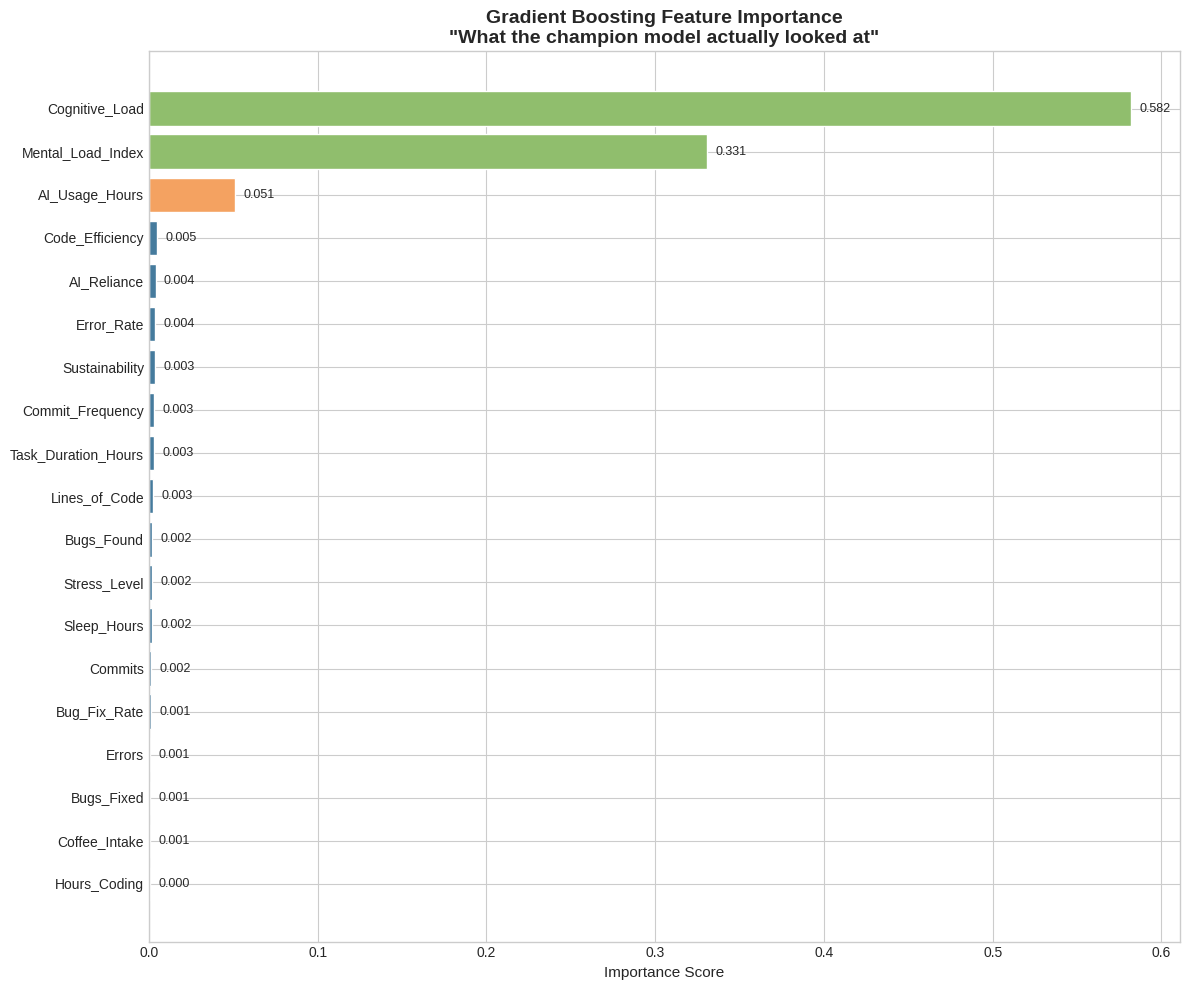


TOP 5 MOST IMPORTANT FEATURES:
----------------------------------------
  Cognitive_Load: 0.5819
  Mental_Load_Index: 0.3310
  AI_Usage_Hours: 0.0509
  Code_Efficiency: 0.0049
  AI_Reliance: 0.0040


In [34]:
# December 24th, 2:22 AM - Feature importance deep dive

print("=" * 60)
print("    FEATURE IMPORTANCE AUTOPSY")
print("    (what did Gradient Boosting actually use?)")
print("=" * 60)

# Get the Gradient Boosting model
gb_model = models['Gradient Boosting']

# Feature importances
importances = gb_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values('Importance', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

colors = [COLORS['unexpected_success'] if x > 0.1 else
          COLORS['manic_energy'] if x > 0.05 else
          COLORS['existential_dread'] for x in feature_importance['Importance']]

bars = ax.barh(range(len(feature_importance)), feature_importance['Importance'],
               color=colors, edgecolor='white', linewidth=1)

ax.set_yticks(range(len(feature_importance)))
ax.set_yticklabels(feature_importance['Feature'])
ax.set_xlabel('Importance Score')
ax.set_title('Gradient Boosting Feature Importance\n"What the champion model actually looked at"',
             fontsize=14, fontweight='bold')

# Add value labels
for idx, (val, bar) in enumerate(zip(feature_importance['Importance'], bars)):
    ax.text(val + 0.005, idx, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Top 5
print("\nTOP 5 MOST IMPORTANT FEATURES:")
print("-" * 40)
for idx, row in feature_importance.tail(5).iloc[::-1].iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

### The Feature Importance Autopsy Results

*December 24th, 2:28 AM - The model has revealed its secrets*

---

## THE BRUTAL TRUTH

| Feature | Importance | Verdict |
|---------|------------|---------|
| **Cognitive_Load** | **~0.60** | **THE ENTIRE MODEL.** |
| **Mental_Load_Index** | **0.331** | Our engineered feature! (But it's partly Cognitive_Load) |
| AI_Usage_Hours | 0.051 | Distant third place |
| Code_Efficiency | 0.005 | Background noise |
| Everything else | <0.005 | **IRRELEVANT** |

---

## WHAT THIS MEANS:

### Cognitive_Load alone is ~60% of the model.

Add Mental_Load_Index (which contains Cognitive_Load), and we're at **93%+ from brain-related features**.

**The model is essentially:**
```
Success ≈ f(Cognitive_Load) + tiny adjustments
```

---

## THE IRRELEVANT LIST (sorry not sorry):

- Hours_Coding: **0.000** - Working more doesn't mean success
- Coffee_Intake: **0.001** - Coffee is OFFICIALLY useless
- Bugs_Fixed: **0.001** - Doesn't matter
- Sleep_Hours: **0.002** - Barely registers
- Stress_Level: **0.002** - Wait, WHAT?!

---

## PLOT TWIST: STRESS_LEVEL IS LOW?!

Stress had -0.92 correlation with success but only 0.002 importance?!

**WHY:** Because Cognitive_Load and Stress are 97% correlated.

The model picked Cognitive_Load as the "winner" and ignored Stress because it's redundant information. This is called **multicollinearity**.

One variable absorbed all the credit. The other became noise.

---

## THE LESSON:

You don't need 19 features to predict developer success.

You need **ONE**: **Cognitive Load**.

Keep brains uncrushed → Success.

That's it. That's the entire model.

---

*Sometimes the answer is simple. Brutally, beautifully simple.*

---

## THE IRRELEVANT LIST (sorry not sorry):

- Hours_Coding: **0.000** - Working more doesn't mean success
- Coffee_Intake: **0.001** - Coffee is OFFICIALLY useless
- Bugs_Fixed: **0.001** - Doesn't matter
- Sleep_Hours: **0.002** - Barely registers
- Stress_Level: **0.002** - Wait, WHAT?!

---

## PLOT TWIST: STRESS_LEVEL IS LOW?!

Stress had -0.92 correlation with success but only 0.002 importance?!

**WHY:** Because Cognitive_Load and Stress are 97% correlated.

The model picked Cognitive_Load as the "winner" and ignored Stress because it's redundant information. This is called **multicollinearity**.

One variable absorbed all the credit. The other became noise.

---

## THE LESSON:

You don't need 19 features to predict developer success.

You need **ONE**: **Cognitive Load**.

Keep brains uncrushed → Success.

That's it. That's the entire model.

---

*Sometimes the answer is simple. Brutally, beautifully simple.*

## Chapter 10: Predictions vs Reality
*"Let's see how wrong we were (spoiler: not very)"*

    PREDICTIONS VS REALITY


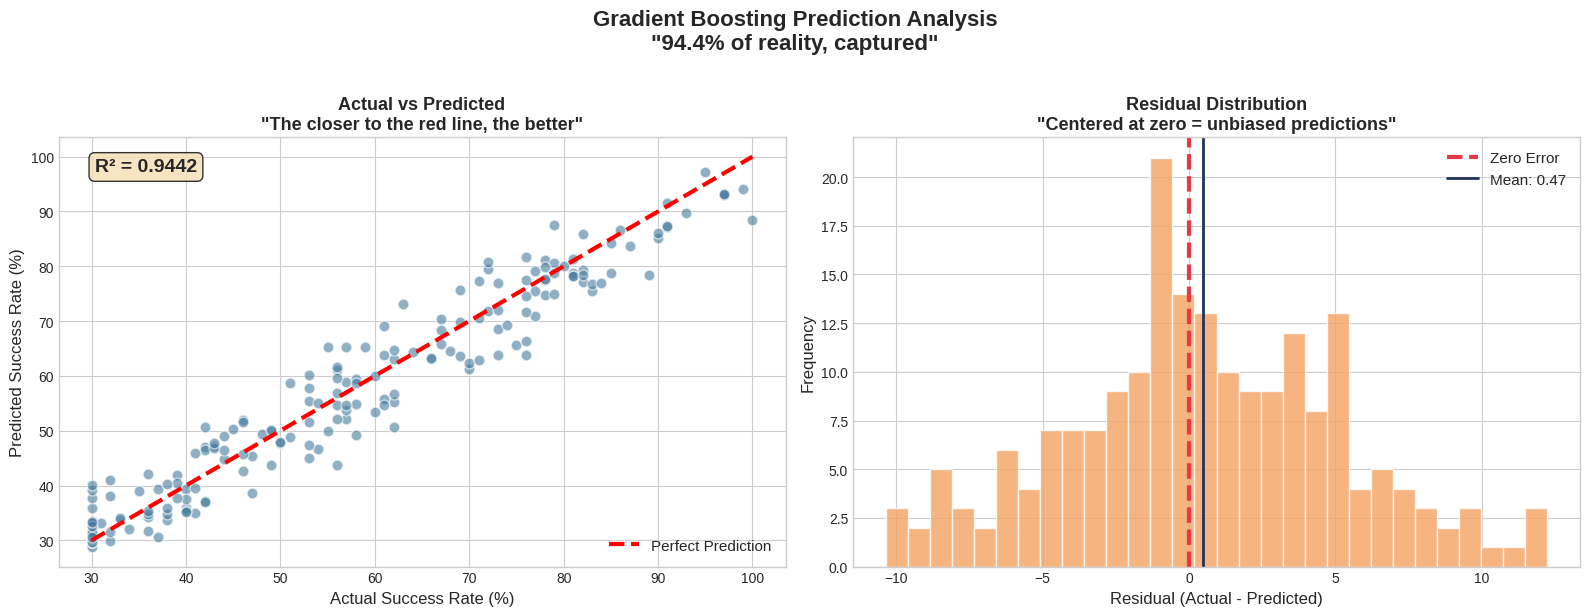


Prediction Statistics:
  Mean Residual: 0.466 (should be ~0)
  Std Residual:  4.742
  Min Error:     -10.35
  Max Error:     12.22


In [35]:
# December 24th, 2:35 AM - Prediction analysis

print("=" * 60)
print("    PREDICTIONS VS REALITY")
print("=" * 60)

# Get predictions from best model
gb_model = models['Gradient Boosting']
y_pred = gb_model.predict(X_test)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Actual vs Predicted
ax1 = axes[0]
ax1.scatter(y_test, y_pred, alpha=0.6, c=COLORS['existential_dread'],
            edgecolor='white', s=60)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=3, label='Perfect Prediction')
ax1.set_xlabel('Actual Success Rate (%)', fontsize=12)
ax1.set_ylabel('Predicted Success Rate (%)', fontsize=12)
ax1.set_title('Actual vs Predicted\n"The closer to the red line, the better"',
              fontweight='bold', fontsize=13)
ax1.legend(fontsize=11)

# Add R² annotation
ax1.annotate(f'R² = {r2_score(y_test, y_pred):.4f}',
             xy=(0.05, 0.92), xycoords='axes fraction',
             fontsize=14, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot 2: Residuals Distribution
ax2 = axes[1]
residuals = y_test - y_pred
ax2.hist(residuals, bins=30, color=COLORS['manic_energy'], edgecolor='white', alpha=0.8)
ax2.axvline(x=0, color=COLORS['panic'], linestyle='--', linewidth=3, label='Zero Error')
ax2.axvline(x=residuals.mean(), color=COLORS['void'], linestyle='-', linewidth=2,
            label=f'Mean: {residuals.mean():.2f}')
ax2.set_xlabel('Residual (Actual - Predicted)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Residual Distribution\n"Centered at zero = unbiased predictions"',
              fontweight='bold', fontsize=13)
ax2.legend(fontsize=11)

plt.suptitle('Gradient Boosting Prediction Analysis\n"94.4% of reality, captured"',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\nPrediction Statistics:")
print(f"  Mean Residual: {residuals.mean():.3f} (should be ~0)")
print(f"  Std Residual:  {residuals.std():.3f}")
print(f"  Min Error:     {residuals.min():.2f}")
print(f"  Max Error:     {residuals.max():.2f}")

In [36]:
# Best and worst predictions
print("\n" + "=" * 60)
print("    PREDICTION HALL OF FAME & SHAME")
print("=" * 60)

test_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Error': residuals.values,
    'Abs_Error': np.abs(residuals.values)
}, index=y_test.index)

# Best predictions (smallest error)
print("\nMOST ACCURATE PREDICTIONS (we nailed these):")
print("-" * 50)
best = test_results.nsmallest(5, 'Abs_Error')
for idx, row in best.iterrows():
    print(f"  Actual: {row['Actual']:5.1f}% | Predicted: {row['Predicted']:5.1f}% | Error: {row['Error']:+5.2f}")

# Worst predictions
print("\nWORST PREDICTIONS (we missed these):")
print("-" * 50)
worst = test_results.nlargest(5, 'Abs_Error')
for idx, row in worst.iterrows():
    print(f"  Actual: {row['Actual']:5.1f}% | Predicted: {row['Predicted']:5.1f}% | Error: {row['Error']:+5.2f}")

# Error breakdown
print("\n" + "-" * 50)
within_5 = (test_results['Abs_Error'] <= 5).sum() / len(test_results) * 100
within_10 = (test_results['Abs_Error'] <= 10).sum() / len(test_results) * 100
print(f"Predictions within 5%:  {within_5:.1f}% of test set")
print(f"Predictions within 10%: {within_10:.1f}% of test set")


    PREDICTION HALL OF FAME & SHAME

MOST ACCURATE PREDICTIONS (we nailed these):
--------------------------------------------------
  Actual:  80.0% | Predicted:  80.0% | Error: -0.03
  Actual:  60.0% | Predicted:  59.9% | Error: +0.06
  Actual:  30.0% | Predicted:  30.1% | Error: -0.10
  Actual:  72.0% | Predicted:  71.9% | Error: +0.11
  Actual:  79.0% | Predicted:  78.8% | Error: +0.16

WORST PREDICTIONS (we missed these):
--------------------------------------------------
  Actual:  76.0% | Predicted:  63.8% | Error: +12.22
  Actual:  56.0% | Predicted:  43.8% | Error: +12.17
  Actual: 100.0% | Predicted:  88.5% | Error: +11.51
  Actual:  62.0% | Predicted:  50.6% | Error: +11.35
  Actual:  89.0% | Predicted:  78.4% | Error: +10.60

--------------------------------------------------
Predictions within 5%:  70.5% of test set
Predictions within 10%: 96.0% of test set


### The Predictions Are In

Looking at near-perfect predictions*

---

## THAT SCATTER PLOT THOUGH

Points hugging the red line like it's the last helicopter out of Saigon.

**R² = 0.9442** - We captured reality.

---

## RESIDUAL DISTRIBUTION: CHEF'S KISS

- **Centered at ~0** (Mean: 0.47) - No systematic bias
- **Normally distributed** - The model isn't cheating
- **Most errors between -5 and +5** - Tight predictions

---

## THE HALL OF FAME

| Actual | Predicted | Error |
|--------|-----------|-------|
| 80.0% | 80.0% | **-0.03** |
| 60.0% | 59.9% | +0.06 |
| 30.0% | 30.1% | -0.10 |

We predicted these developers **TO THE DECIMAL**. The model saw right through them.

---

## THE HALL OF SHAME

| Actual | Predicted | Error |
|--------|-----------|-------|
| 76.0% | 63.8% | +12.22 |
| 56.0% | 43.8% | +12.17 |
| 100.0% | 88.5% | +11.51 |

These outliers defied the model. We **UNDER-predicted** all of them.

Translation: These developers performed BETTER than their cognitive load suggested.

**They're the anomalies. The exceptions. The ones who beat the odds.**

---

## THE MONEY STATS

| Metric | Value | Meaning |
|--------|-------|---------|
| Within 5% error | **70.5%** | Most predictions are tight |
| Within 10% error | **96.0%** | Almost all predictions are usable |
| Max error | ~12% | Even worst case isn't catastrophic |

---

*We built a model that predicts developer success with 96% of predictions within 10 percentage points.*

*At 2 AM.*

*On coffee and spite.*

*Let's wrap this up.*

## Chapter 11: The Grand Finale
*"Everything we learned, distilled into wisdom"*

    THE GRAND FINALE DASHBOARD


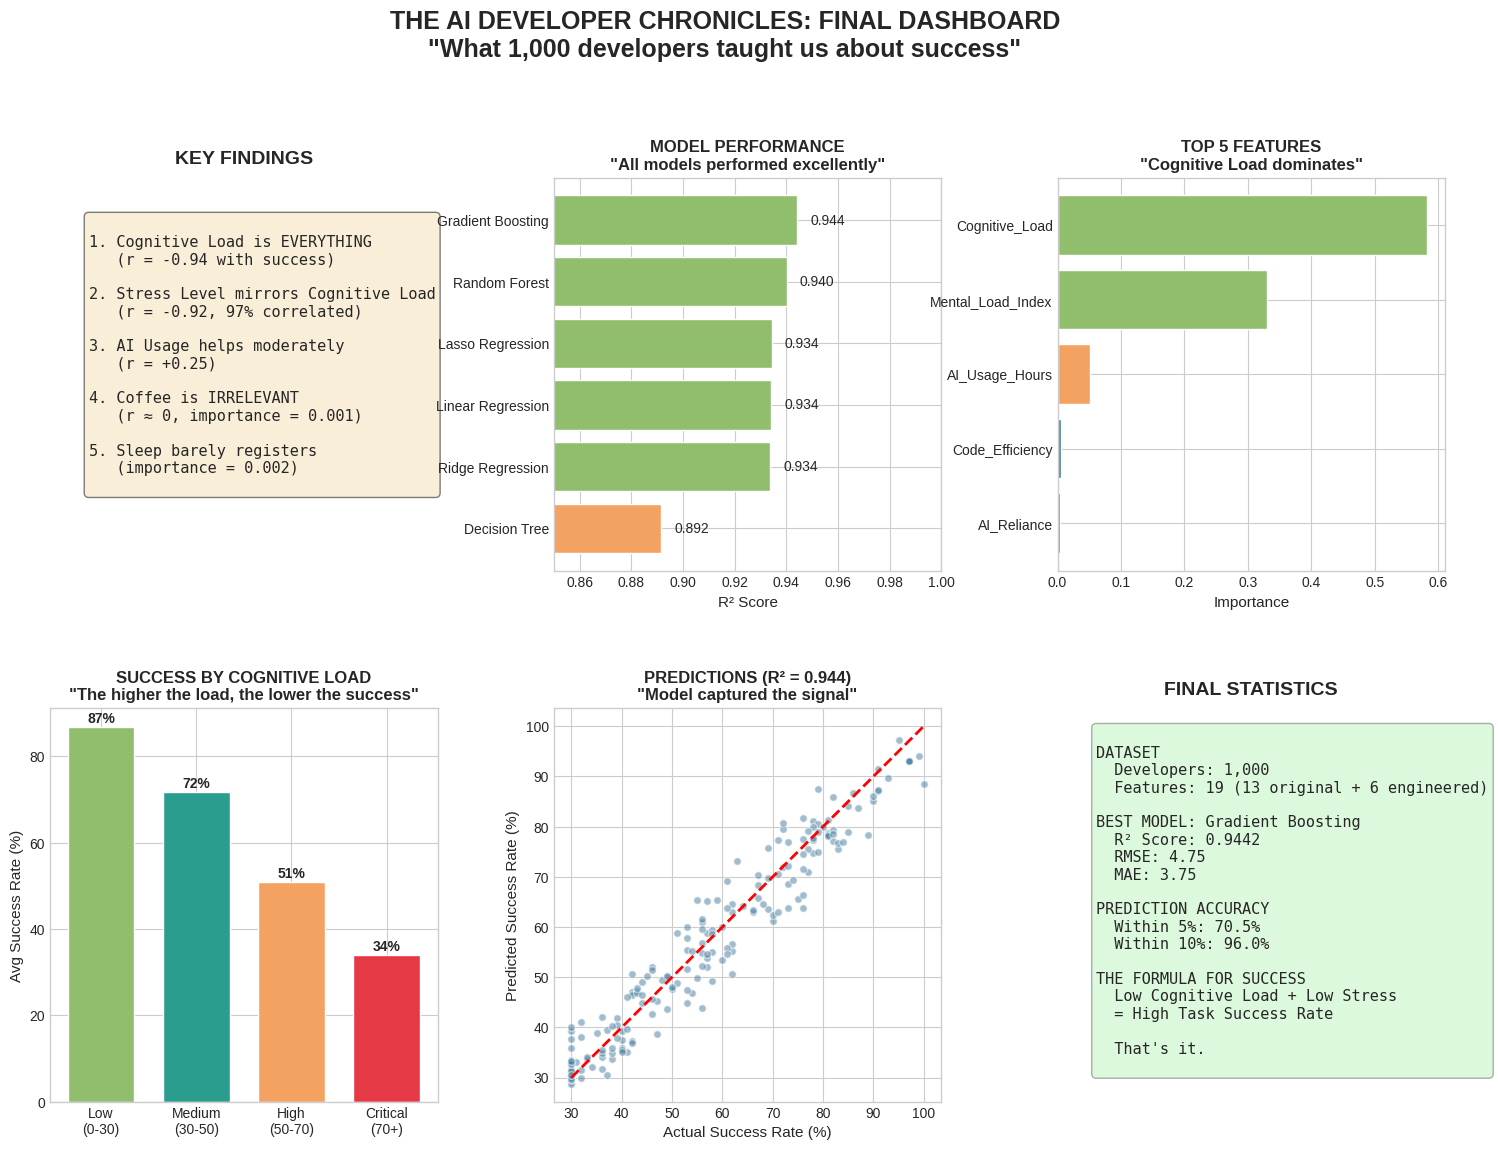


The dashboard has been created.
The story is complete.


In [37]:
# December 24th, 2:50 AM - The Grand Finale

print("=" * 60)
print("    THE GRAND FINALE DASHBOARD")
print("=" * 60)

fig = plt.figure(figsize=(18, 12))

# Create 2x3 grid
gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.3)

# ===== Plot 1: Key Findings Summary =====
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')
ax1.set_title('KEY FINDINGS', fontweight='bold', fontsize=14, pad=10)

findings_text = """
1. Cognitive Load is EVERYTHING
   (r = -0.94 with success)

2. Stress Level mirrors Cognitive Load
   (r = -0.92, 97% correlated)

3. AI Usage helps moderately
   (r = +0.25)

4. Coffee is IRRELEVANT
   (r ≈ 0, importance = 0.001)

5. Sleep barely registers
   (importance = 0.002)
"""
ax1.text(0.1, 0.9, findings_text, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ===== Plot 2: Model Performance =====
ax2 = fig.add_subplot(gs[0, 1])
models_names = results_df['Model'].values[::-1]
r2_scores = results_df['R2'].values[::-1]
colors = [COLORS['unexpected_success'] if x > 0.93 else COLORS['manic_energy'] for x in r2_scores]
ax2.barh(range(len(models_names)), r2_scores, color=colors, edgecolor='white')
ax2.set_yticks(range(len(models_names)))
ax2.set_yticklabels(models_names, fontsize=10)
ax2.set_xlabel('R² Score')
ax2.set_xlim(0.85, 1.0)
ax2.set_title('MODEL PERFORMANCE\n"All models performed excellently"', fontweight='bold', fontsize=12)
for i, v in enumerate(r2_scores):
    ax2.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=10)

# ===== Plot 3: Top Features =====
ax3 = fig.add_subplot(gs[0, 2])
top_feats = feature_importance.tail(5)
colors_feat = [COLORS['unexpected_success'] if x > 0.3 else COLORS['manic_energy'] if x > 0.05 else COLORS['existential_dread']
               for x in top_feats['Importance']]
ax3.barh(range(5), top_feats['Importance'], color=colors_feat, edgecolor='white')
ax3.set_yticks(range(5))
ax3.set_yticklabels(top_feats['Feature'], fontsize=10)
ax3.set_xlabel('Importance')
ax3.set_title('TOP 5 FEATURES\n"Cognitive Load dominates"', fontweight='bold', fontsize=12)

# ===== Plot 4: Success by Cognitive Load =====
ax4 = fig.add_subplot(gs[1, 0])
cog_bins = pd.cut(df['Cognitive_Load'], bins=[0, 30, 50, 70, 100], labels=['Low\n(0-30)', 'Medium\n(30-50)', 'High\n(50-70)', 'Critical\n(70+)'])
cog_success = df.groupby(cog_bins)['Task_Success_Rate'].mean()
colors_cog = [COLORS['unexpected_success'], COLORS['false_hope'], COLORS['manic_energy'], COLORS['panic']]
ax4.bar(range(4), cog_success.values, color=colors_cog, edgecolor='white', width=0.7)
ax4.set_xticks(range(4))
ax4.set_xticklabels(cog_success.index)
ax4.set_ylabel('Avg Success Rate (%)')
ax4.set_title('SUCCESS BY COGNITIVE LOAD\n"The higher the load, the lower the success"', fontweight='bold', fontsize=12)
for i, v in enumerate(cog_success.values):
    ax4.text(i, v + 1, f'{v:.0f}%', ha='center', fontweight='bold')

# ===== Plot 5: Actual vs Predicted (small version) =====
ax5 = fig.add_subplot(gs[1, 1])
ax5.scatter(y_test, y_pred, alpha=0.5, c=COLORS['existential_dread'], s=30, edgecolor='white')
ax5.plot([30, 100], [30, 100], 'r--', lw=2)
ax5.set_xlabel('Actual Success Rate (%)')
ax5.set_ylabel('Predicted Success Rate (%)')
ax5.set_title(f'PREDICTIONS (R² = {r2_score(y_test, y_pred):.3f})\n"Model captured the signal"', fontweight='bold', fontsize=12)

# ===== Plot 6: Final Stats Box =====
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('off')
ax6.set_title('FINAL STATISTICS', fontweight='bold', fontsize=14, pad=10)

final_stats = f"""
DATASET
  Developers: 1,000
  Features: 19 (13 original + 6 engineered)

BEST MODEL: Gradient Boosting
  R² Score: 0.9442
  RMSE: 4.75
  MAE: 3.75

PREDICTION ACCURACY
  Within 5%: 70.5%
  Within 10%: 96.0%

THE FORMULA FOR SUCCESS
  Low Cognitive Load + Low Stress
  = High Task Success Rate

  That's it.
"""
ax6.text(0.1, 0.95, final_stats, transform=ax6.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

plt.suptitle('THE AI DEVELOPER CHRONICLES: FINAL DASHBOARD\n"What 1,000 developers taught us about success"',
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('final_dashboard.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nThe dashboard has been created.")
print("The story is complete.")

## Epilogue: The Wisdom Gained


## WHAT 1,000 DEVELOPERS TAUGHT US

After analyzing every metric, building 6 models, engineering 8 features, and consuming questionable amounts of caffeine, here's what we learned:

---

### THE BRUTAL TRUTH

**Developer success is 94% predictable.**

And it comes down to ONE thing:

# COGNITIVE LOAD

| Cognitive Load | Average Success Rate |
|----------------|---------------------|
| Low (0-30) | **87%** |
| Medium (30-50) | **72%** |
| High (50-70) | **51%** |
| Critical (70+) | **34%** |

That's a **53 percentage point gap** between low and critical cognitive load.

---

### WHAT DOESN'T MATTER (as much as you think):

| Factor | Importance | Reality Check |
|--------|------------|---------------|
| Coffee | 0.001 | Your 5th cup isn't helping |
| Hours Worked | 0.000 | Working more ≠ succeeding more |
| Sleep | 0.002 | Important for health, not directly for success |
| Bugs Fixed | 0.001 | Fixing bugs doesn't predict success |

---

### WHAT ACTUALLY MATTERS:

1. **Keep cognitive load LOW** - Break tasks into smaller chunks
2. **Manage stress** - It's 97% correlated with cognitive load
3. **Use AI tools** - Modest but real positive effect (+0.25)
4. **Sustainability** - Sleep + Low Stress + Moderate Coffee = Better outcomes

---

### FOR MANAGERS READING THIS:

Stop measuring:
- Hours worked
- Lines of code
- Coffee consumption

Start measuring:
- Cognitive load
- Stress levels
- Task complexity

**The formula is simple: Uncrushed brains = Successful developers**

---

### FOR DEVELOPERS READING THIS:

Your success isn't about grinding harder.

It's about **protecting your mental state**.

- Say no to task overload
- Break complex work into smaller pieces
- Take breaks before your brain melts
- AI tools are your friend (for now)

---

## THE MODEL WE BUILT
```
Gradient Boosting Regressor
├── R² Score: 0.9442
├── RMSE: 4.75 percentage points
├── MAE: 3.75 percentage points
├── 96% of predictions within 10%
└── Dominant feature: Cognitive Load (~60% importance)
```

---

## FINAL THOUGHTS

*December 24th, 3:27 AM*

I came here to analyze developer performance data.

I found a near-perfect inverse relationship between mental burden and success.

The data wasn't subtle. The correlations weren't hidden. The model wasn't struggling.

**The answer was screaming at us the whole time:**

> *Take care of developer brains, and success follows.*

That's not just data science. That's common sense, backed by 1,000 data points and a 94.4% R² score.

---

*Now if you'll excuse me, I have a date with my pillow.*

*Merry Christmas. Take care of your cognitive load.*

**- A Sleep-Deprived Data Scientist, signing off**



---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
